### HACKSLASH INDUCTION TASK

To-Do:
● Prepare a detailed python notebook using Linear Regression for predicting the price of
houses in any locality.
● Import all the required libraries.
● Load and pre-process the dataset using the pandas library.
● Print the column data types.
● Visualize the dataset (plot the graphs whenever needed).
● Train the model on the dataset and print error and RMSE (Root Mean Squared Error).


In [ ]:
#Importing the required libraries  Pt1
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
#Importing the required dataset
df=pd.read_csv("https://raw.githubusercontent.com/gitsubh7/DataScience/main/USA_Housing.csv")

In [ ]:
#Printing the datatypes of all the columns
df.dtypes

Avg. Area Income                float64
Avg. Area House Age             float64
Avg. Area Number of Rooms       float64
Avg. Area Number of Bedrooms    float64
Area Population                 float64
Price                           float64
Address                          object
dtype: object

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## BASIC EDA ( Exploratory Data Analysis )

In [ ]:
#Printing the shape of the dataset (rows,columns)
df.shape

(5000, 7)

In [ ]:
#Printing the first five records
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [ ]:
#Finding number of unique values in each colummn
df.nunique()

Avg. Area Income                5000
Avg. Area House Age             5000
Avg. Area Number of Rooms       5000
Avg. Area Number of Bedrooms     255
Area Population                 5000
Price                           5000
Address                         5000
dtype: int64

In [ ]:
#Some basic info of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [ ]:
#Dropping null values as they are irrelvant (if any)
df.dropna(inplace=True)

In [ ]:
df.shape

(5000, 7)

In [ ]:
# Conclusion= No null records

In [ ]:
df['Price'].describe()

count    5.000000e+03
mean     1.232073e+06
std      3.531176e+05
min      1.593866e+04
25%      9.975771e+05
50%      1.232669e+06
75%      1.471210e+06
max      2.469066e+06
Name: Price, dtype: float64

In [ ]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [ ]:
df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


# DATA VISUALIZATIONS

In [ ]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


<ipython-input-16-b9d990957b3f>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


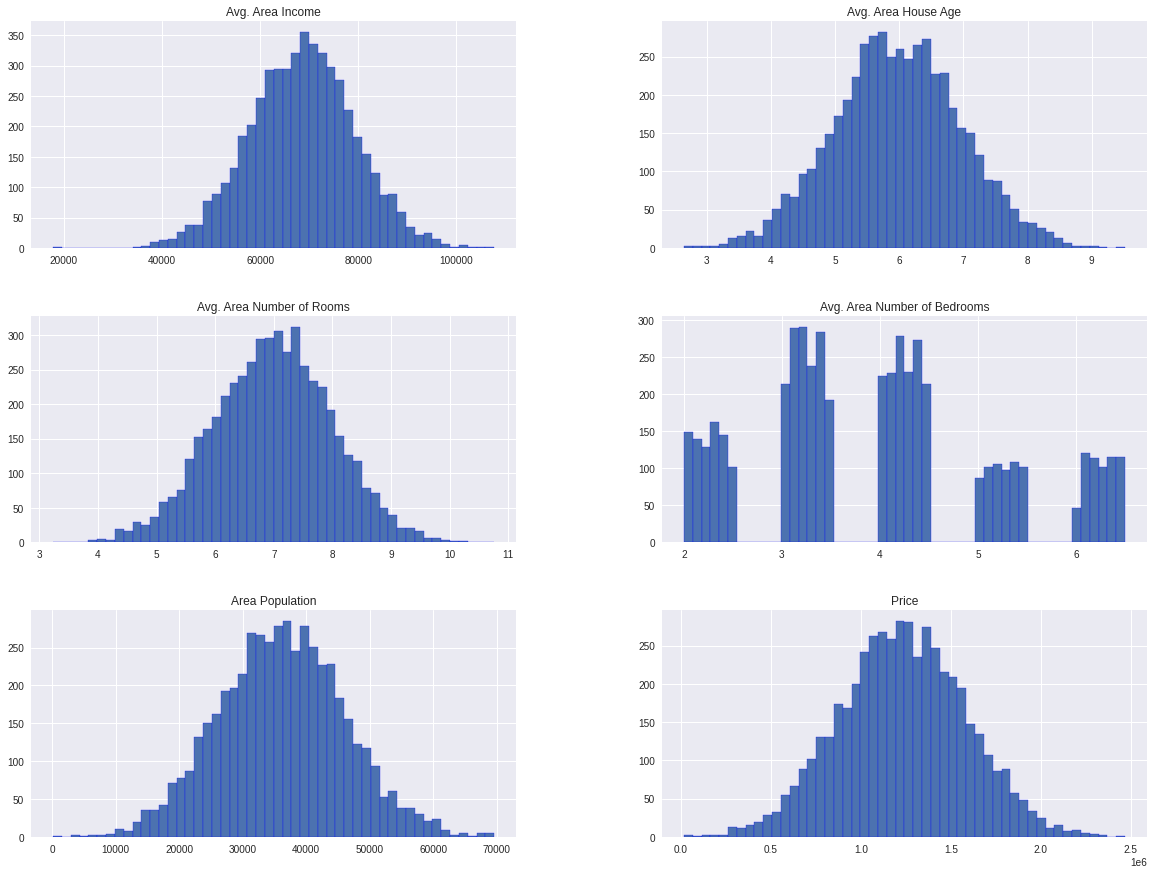

In [ ]:
plt.style.use('seaborn')
df.hist(bins=50, figsize=(20,15), ec = 'b')
plt.show()

<Axes: >

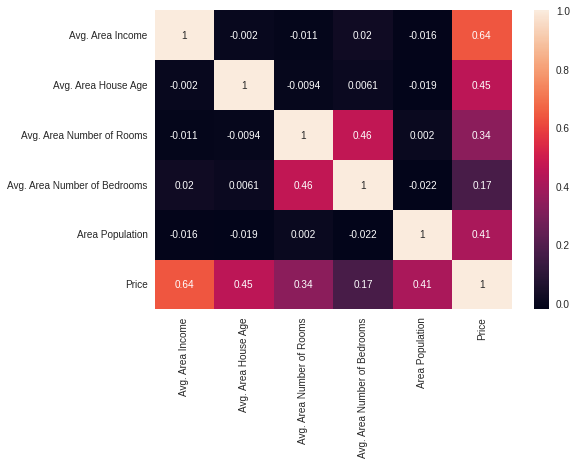

In [ ]:
sns.heatmap(df.corr(),annot=True)

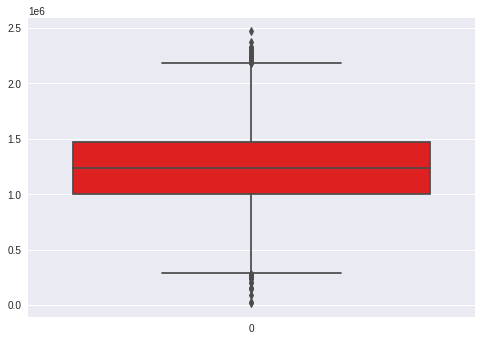

In [ ]:
ax = sns.boxplot(df['Price'], color= 'red')

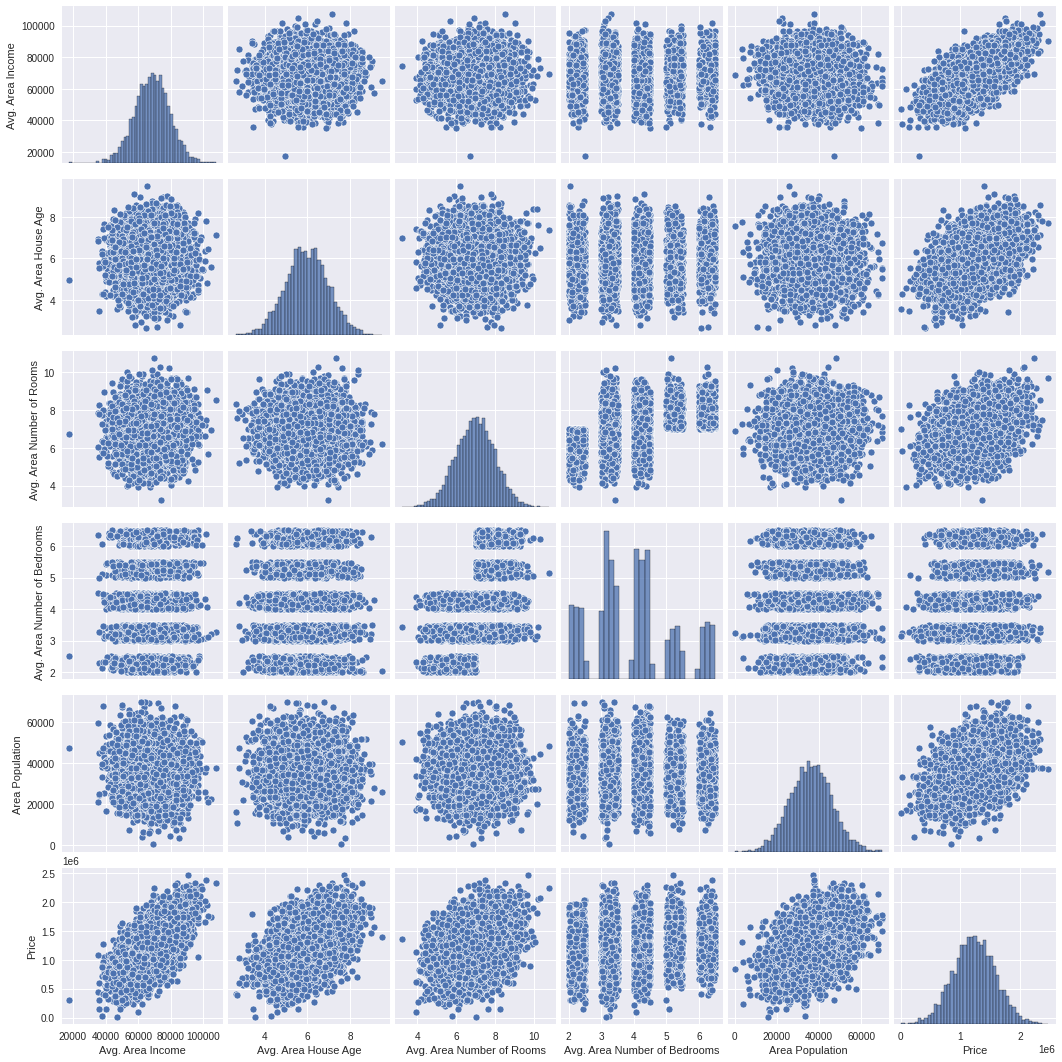

In [ ]:
sns.pairplot(df)

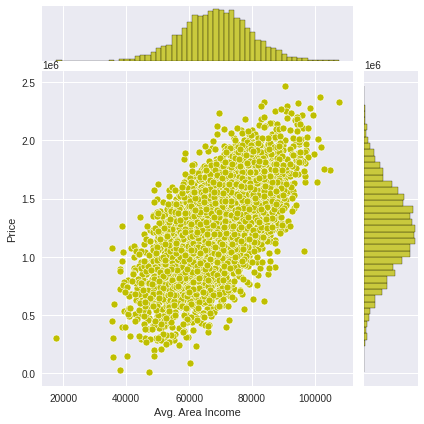

In [ ]:
sns.jointplot(x=df['Avg. Area Income'],y=df['Price'],color='y')

In [ ]:
plt.figure(figsize=(5,5))
sns.barplot(x='Area Population',y='Price',data=df)

<Axes: xlabel='Area Population', ylabel='Price'>

In [ ]:
plt.figure(figsize=(4,4))
sns.distplot(df['Price'],color='b',hist_kws=dict(edgecolor="black", linewidth=1))

In [ ]:
features=['Avg. Area Income', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']
for feature in features:
  sns.histplot(df[feature],kde=True)

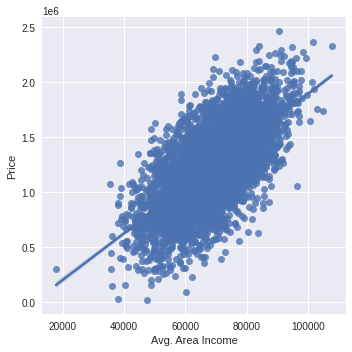

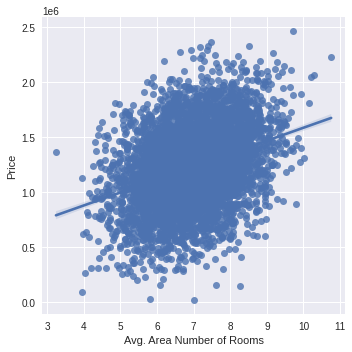

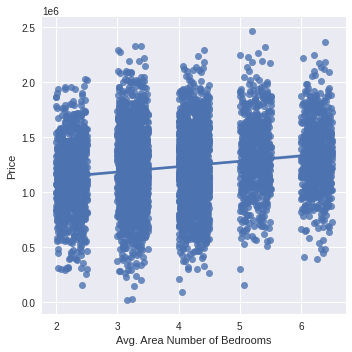

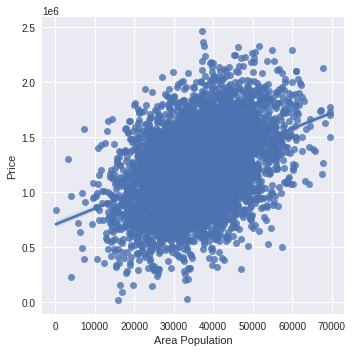

In [ ]:
features=['Avg. Area Income', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']
for feature in features:
 sns.lmplot(x=feature, y='Price', scatter=True, data=df)

# FEATURE EXTRACTION for linear regression

In [ ]:
#excluding the columns address and avg area house age as they wouldnot be major considerable factors for price
df=df.drop(['Avg. Area House Age','Address'],axis=1)

In [ ]:
df.head()

,Avg. Area Income,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,7.839388,4.23,26354.109472,6.309435e+05


In [ ]:
df.shape

(5000, 5)

In [ ]:
df.head()

,Avg. Area Income,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,7.839388,4.23,26354.109472,6.309435e+05


In [ ]:
X=df.drop('Price',axis=1)
Y=df['Price']

In [ ]:
X

,Avg. Area Income,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,7.009188,4.09,23086.800503
1,79248.642455,6.730821,3.09,40173.072174
2,61287.067179,8.512727,5.13,36882.159400
3,63345.240046,5.586729,3.26,34310.242831
4,59982.197226,7.839388,4.23,26354.109472
...,...,...,...,...
4995,60567.944140,6.137356,3.46,22837.361035
4996,78491.275435,6.576763,4.02,25616.115489
4997,63390.686886,4.805081,2.13,33266.145490
4998,68001.331235,7.130144,5.44,42625.620156


# LINEAR REGRESSION TRAINING

In [ ]:
from sklearn.linear_model import LinearRegression      #used for predicting values of the dependent data.
from sklearn.model_selection import train_test_split   #used for categorizing into training and testing dataset
from sklearn.model_selection import cross_val_predict  #used for error between actual and predicted value

In [ ]:
X_train, X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=43)

In [ ]:
X_train.shape

(4000, 4)

In [ ]:
Y_train.shape

(4000,)

In [ ]:
lr=LinearRegression()
#OBJECT FOR THE LINEARREGRESSION CLASS
lr.fit(X_train, Y_train)

LinearRegression()

In [ ]:
lr.score(X_test,Y_test)

0.7108469053184104

In [ ]:
Y_pred = lr.predict(X_test)

In [ ]:
lr.intercept_

-1593008.8254516767

In [ ]:
lr.coef_

array([2.13171972e+01, 1.18568891e+05, 1.84722745e+03, 1.46380787e+01])

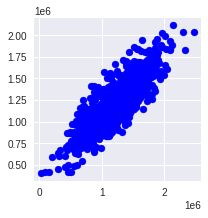

In [ ]:
plt.figure(figsize=(3,3))
plt.scatter(Y_test,Y_pred,color='b')
plt.show()

In [ ]:
co=pd.DataFrame(lr.coef_,X.columns, columns=['Coefficient'])

In [ ]:
co

,Coefficient
Avg. Area Income,21.317197
Avg. Area Number of Rooms,118568.891233
Avg. Area Number of Bedrooms,1847.227449
Area Population,14.638079


<ipython-input-43-b799ed3c0c7a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((Y_test-Y_pred),color='b', hist_kws=dict(edgecolor="black", linewidth=1))


<Axes: xlabel='Price', ylabel='Density'>

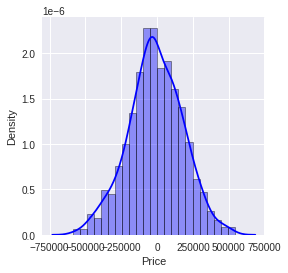

In [ ]:
plt.figure(figsize=(4,4))
sns.distplot((Y_test-Y_pred),color='b', hist_kws=dict(edgecolor="black", linewidth=1))

In [ ]:
residuals=Y_test-Y_pred

In [ ]:
residuals

4851   -106588.276568
3471     23567.019369
4276    -30768.847410
3529     91768.018205
1307   -254023.408215
            ...      
4951    -99669.008026
3521     62573.228554
4856   -542155.081876
4533     92856.951295
1062    -36167.165462
Name: Price, Length: 1000, dtype: float64

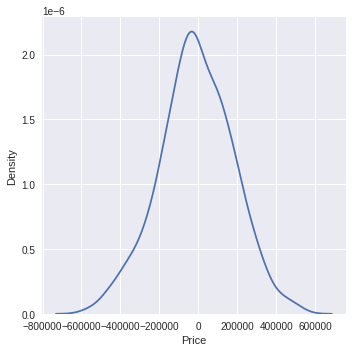

In [ ]:
sns.displot(residuals,kind="kde")

In [ ]:
## PERFORMANCE METRICS

In [ ]:
#R2 SCORE
from sklearn.metrics import r2_score
score1=r2_score(Y_test, Y_pred)
print("The accuracy of our model is {}%".format(round(score1, 2) *100))

The accuracy of our model is 71.0%


In [ ]:
#ADJUSTED R2 SCORE
print("The adjusted r2 score  is :",1 - (1-score1)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1))


The adjusted r2 score  is : 0.7096844808171779


# ERROR CALCULATION

In [ ]:
#MAE
from sklearn.metrics import mean_absolute_error
score2 = mean_absolute_error(Y_test, Y_pred)
print("The Mean Absolute Error of our Model is {}".format(round(score2, 2)))

The Mean Absolute Error of our Model is 150341.24


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
score3=mean_squared_error(Y_test,Y_pred)
print("The MSE of our model is {}".format(round(score3,2)))

The MSE of our model is 36190018678.61


In [ ]:
#RMSE
score4 = np.sqrt(mean_squared_error(Y_test,Y_pred))
print("The RMSE of our Model is {}".format(round(score4, 2)))

The RMSE of our Model is 190236.74
